In [71]:
!pip install scikit-learn
import numpy as np
import pandas as pd
%matplotlib inline

In [13]:
df = pd.read_csv("C:/Desktop/datasets/placement (1).csv")

In [15]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [17]:
df = df.iloc[:,1:]

In [19]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [21]:
# preprocess + EDA + FeatureSelection
# extract i/p o/p cols
# scale the values
# eg age and salary some algo works by calculating distances if x,y bohot vary kar raha hai then its meaningless 
# train test split
# model evaluation/selection
# deployment

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [31]:
import matplotlib.pyplot as plt


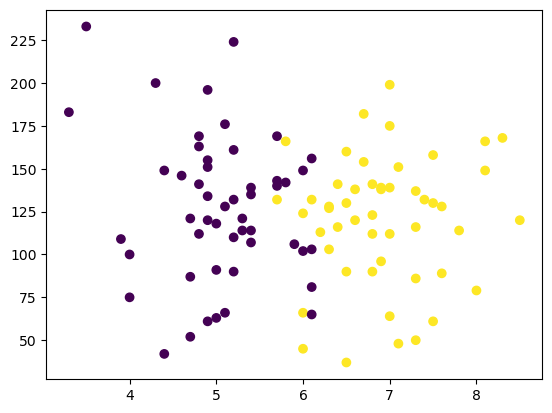

In [35]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [37]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [39]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [41]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)

In [49]:
Y_train

37    1
11    1
17    0
71    1
87    1
     ..
2     0
12    0
52    1
90    1
33    0
Name: placement, Length: 90, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [59]:
X_train

array([[ 1.84943629,  0.59341168],
       [ 0.80148708,  0.31110627],
       [-2.34236054,  1.46599204],
       [ 0.10285427,  0.1571215 ],
       [-0.24646213,  0.1571215 ],
       [-0.24646213,  0.43942691],
       [-0.68310763,  2.51822131],
       [-1.03242403,  0.38809865],
       [ 0.45217068,  0.10579324],
       [ 2.19875269, -0.15084804],
       [ 0.62682888,  0.72173232],
       [ 0.62682888,  1.44032791],
       [-1.03242403, -0.35616107],
       [ 0.53949978, -0.15084804],
       [ 0.27751248, -0.58713823],
       [-1.81838594, -0.43315346],
       [-0.68310763,  0.90138122],
       [ 1.15080348,  0.28544214],
       [-0.07180393, -0.51014584],
       [ 0.71415798, -0.35616107],
       [-1.11975313, -1.89600877],
       [-1.38174044,  0.59341168],
       [ 0.10285427,  0.77306058],
       [ 0.45217068, -2.2809707 ],
       [ 0.01552517, -0.04819153],
       [ 0.71415798, -0.07385566],
       [-0.85776583, -0.2021763 ],
       [ 0.97614528,  0.64473994],
       [-1.46906954,

In [61]:
X_test = scaler.transform(X_test)

In [63]:
X_test

array([[-0.85776583, -1.61370336],
       [ 0.27751248,  0.05446498],
       [-1.11975313, -0.99776428],
       [ 0.01552517, -2.07565767],
       [-0.15913303,  1.02970186],
       [-0.77043673,  0.05446498],
       [ 1.32546168,  0.82438883],
       [-0.68310763, -0.92077189],
       [ 1.15080348, -1.94733703],
       [ 1.58744898, -0.30483281]])

In [143]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [109]:
## finding coefs and intercept

# eqn = > y= mx+b
slope = lin_reg.coef_[0]
y_intercept = lin_reg.intercept_
print(slope)
print(y_intercept)

0.41109832394196844
0.4888888888888888


In [145]:
y_pred = lin_reg.predict(X_test)


In [147]:
y_pred

array([0.13813713, 0.60291054, 0.02971917, 0.49768216, 0.42227356,
       0.17210038, 1.03282643, 0.20913397, 0.96424413, 1.14184057])

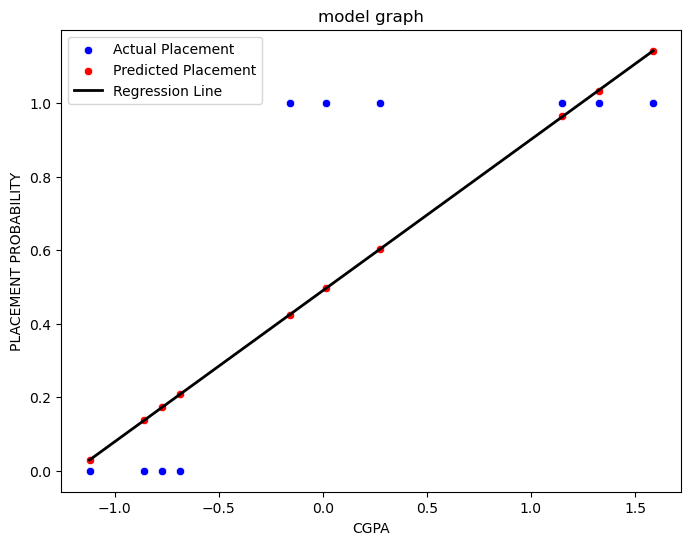

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

X_test = np.array(X_test)  
Y_test = np.array(Y_test)
y_pred = np.array(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=Y_test, color="blue", label="Actual Placement")  
sns.scatterplot(x=X_test[:, 0], y=y_pred, color='red', label='Predicted Placement')

# Regression line
X_line = np.linspace(min(X_test[:,0]),max(X_test[:, 0]),100) # Generating CGPA values
IQ_mean = np.mean(X_test[:, 1])  # Use mean IQ for prediction 
X_line_combined = np.column_stack((X_line, np.full_like(X_line, IQ_mean)))  # Combine CGPA & IQ
Y_line = lin_reg.predict(X_line_combined)     # Predict Y values
 
plt.plot(X_line, Y_line, color="black", linewidth=2, label="Regression Line") 

plt.xlabel("CGPA")
plt.ylabel("PLACEMENT PROBABILITY")
plt.title("model graph")
plt.legend()
plt.show()

In [166]:
df_error = pd.DataFrame()
df_error['y_test'] = Y_test
df_error['y_pred'] = y_pred
df_error.astype(int)

,y_test,y_pred
0,0,0
1,1,0
2,0,0
3,1,0
4,1,0
5,0,0
6,1,1
7,0,0
8,1,0
9,1,1


In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)

print(f'R2 score :{r2}')
print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'root mse: {rmse}')

R2 score :0.6418472705183684
mse: 0.08595665507559161
mae: 0.22366472614819138
root mse: 0.29318365417531655


In [176]:
from sklearn.linear_model import LogisticRegression

In [178]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [196]:
y_predict = clf.predict(X_test)

In [198]:
df_error1 = pd.DataFrame()
df_error1['y_test'] = Y_test
df_error1['y_pred'] = y_predict

In [200]:
df_error1

,y_test,y_pred
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.9

<Axes: >

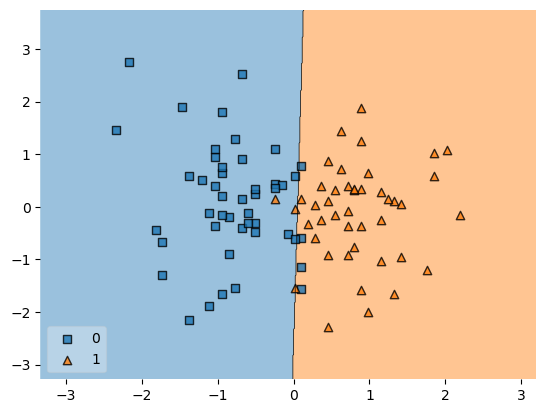

In [214]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train ,Y_train.values, clf=clf, legend=3)